<a href="https://colab.research.google.com/github/MyriamJo/-ML-52-6738/blob/main/Clustering_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Lab 2 - Clustering Exercise**

In this exercise, we will apply our knowledge of clustering on the following dataset:

Dataset Link:
https://www.kaggle.com/datasets/arjunbhasin2013/ccdata

Clustering on this dataset will be done using KMeans, Hierarchal clustering and DBSCAN. Finding the optimal hypermaters for each and then choosing the best model among the three

Start by Importing needed libraries

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Reading the dataset into a DataFrame

In [134]:
df = pd.read_csv('/content/CC GENERAL.csv')

In [135]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [137]:
df = df.fillna(0)

we will make the CUST_ID the index of the df since it's unique and the only categorical feature in the df

In [138]:
df.set_index('CUST_ID', inplace=True)

In [139]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

In [140]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4493.947277,1733.143852,833.983453,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.922543,2895.063757,2335.989918,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,163.028164,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,289.628402,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,788.713501,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


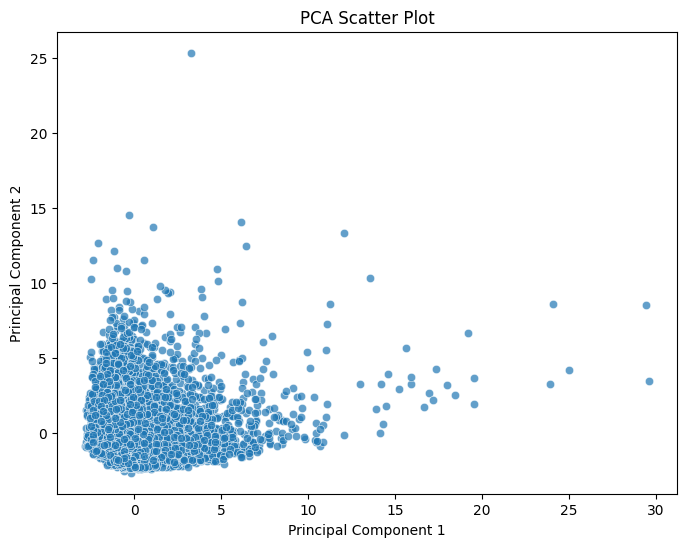

In [142]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(scaled_df)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], alpha=0.7)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Scatter Plot")

plt.show()


## K-Means

Find the optimal Kmeans model

In [141]:
from sklearn.cluster import KMeans

from the following PCA, we can deduce that the data can be clustered into 2 ( 1 for the data and another one for the outliers)  

In [143]:
ssd = []

for k in range(2,10):

    model = KMeans(n_clusters=k,random_state=60)


    model.fit(scaled_df)

    #Sum of squared distances of samples to their closest cluster center.
    ssd.append(model.inertia_)

Text(0, 0.5, ' Sum of Squared Distances')

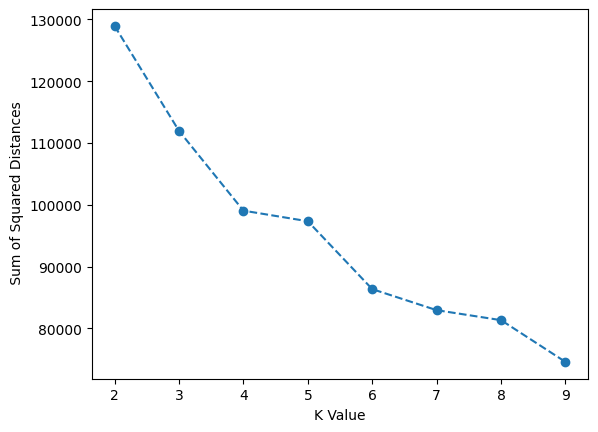

In [144]:
plt.plot(range(2,10),ssd,'o--')
plt.xlabel("K Value")
plt.ylabel(" Sum of Squared Distances")

In [145]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
ssd1 = []

for k in range(2,10):

    model = KMeans(n_clusters=k,random_state=60)


    labels= model.fit_predict(scaled_df)

    silhouette=silhouette_score(scaled_df,labels)
    ssd1.append(silhouette)

Text(0, 0.5, 'Silhouette_score')

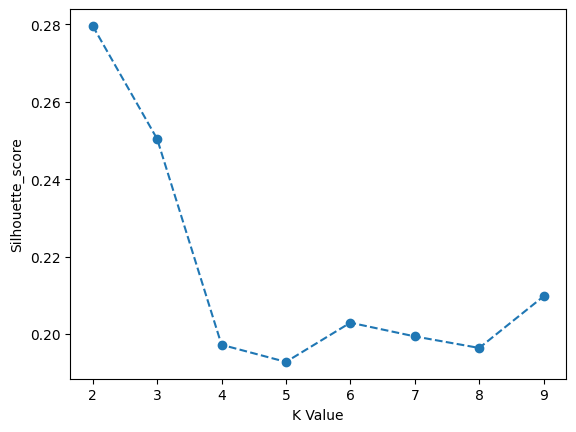

In [146]:
plt.plot(range(2,10),ssd1,'o--')
plt.xlabel("K Value")
plt.ylabel("Silhouette_score")

Choose the optimal K and calculate the silhouette score for the best model.

From 1st graph, we deduce that k=4 using elbow method

From 2nd graph, we deduce that k=2 to give the best silhouette score

To compromise between compactness of clusters and separation between clusters we will choose k=3

## Agglomerative Clustering

Find the optimal agglomerative clustering model.

Text(0, 0.5, 'Silhouette_score')

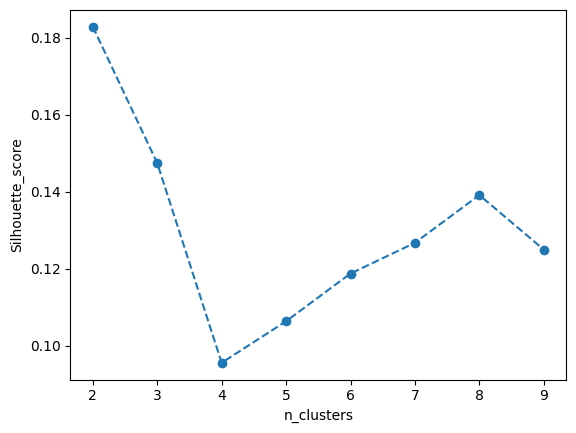

In [ ]:
s=[]

for n_clusters in range(2,10):
  model = AgglomerativeClustering(n_clusters=n_clusters, metric="cosine", linkage="average")
  model = model.fit(scaled_df)
  silhouette=silhouette_score(scaled_df,model.labels_)
  s.append(silhouette)

plt.plot(range(2,10),s,'o--')
plt.xlabel("n_clusters")
plt.ylabel("Silhouette_score")

Text(0, 0.5, 'Silhouette_score')

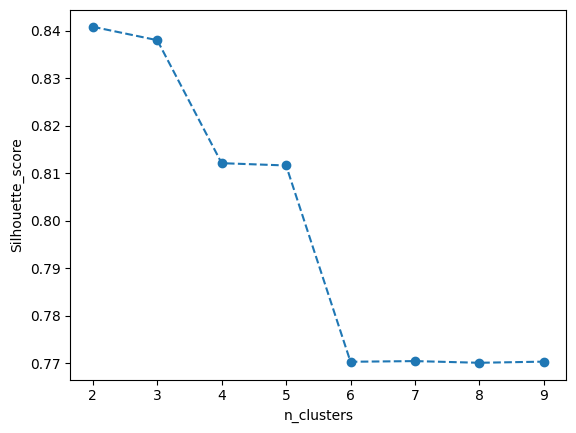

In [ ]:
s1=[]

for n_clusters in range(2,10):
  model = AgglomerativeClustering(n_clusters=n_clusters, metric="euclidean", linkage="single")
  model = model.fit(scaled_df)
  silhouette=silhouette_score(scaled_df,model.labels_)
  s1.append(silhouette)

plt.plot(range(2,10),s1,'o--')
plt.xlabel("n_clusters")
plt.ylabel("Silhouette_score")

Choose the optimal K and calculate the silhouette score for the best model.

- From 2 graphs, we can deduce n_clusters=2, metric="euclidean"and linkage="single" gives the best silhouette score

## DBSCAN

Find the optimal DBSCAN model.

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score


dbscan = DBSCAN(eps=1, min_samples=5)
cluster_labels = dbscan.fit_predict(scaled_df)
sil_score= silhouette_score(scaled_df, cluster_labels)

In [ ]:
import numpy as np
print(sil_score)
print(np.unique(cluster_labels))


-0.2486660171857811
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]


In [ ]:
cluster_labels = dbscan.fit_predict(scaled_df)
pd.Series(cluster_labels).value_counts()

,count
0,5794
-1,3085
11,7
8,7
1,6
13,5
6,5
12,5
10,5
2,5


In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=2.0, min_samples=7)
cluster_labels = dbscan.fit_predict(scaled_df)
sil_score2= silhouette_score(scaled_df, cluster_labels)

In [ ]:
import numpy as np
print(sil_score2)
print(np.unique(cluster_labels))


0.47465316498746524
[-1  0]


In [ ]:
cluster_labels = dbscan.fit_predict(scaled_df)
pd.Series(cluster_labels).value_counts()

,count
0,8290
-1,660


In [ ]:
dbscan2 = DBSCAN(eps=2.5, min_samples=7)
cluster_labels2 = dbscan2.fit_predict(scaled_df)
silhouette_score2= silhouette_score(scaled_df, cluster_labels)

In [ ]:
import numpy as np
print(silhouette_score2)
print(np.unique(cluster_labels2))

0.47465316498746524
[-1  0]


In [ ]:
cluster_labels = dbscan2.fit_predict(scaled_df)
pd.Series(cluster_labels).value_counts()

,count
0,8594
-1,356


Find the parameters that optimize the performance of your model and calculate the silhouette score.

- we needed to increase the min_samples and epslon to avoid clustering the outliers
- After many iterations, we can deduce that eps=2.5 and min_samples=7 give the best silhouette score while taking into consideration that the percentage of the outliers does not exceed 5 % of the data  

## Result Interpretation and Discussion

Which model was chosen? Why was it chosen and based on what?

   - Using PCA, the best number of clusters=2  
   
   - Analysing the distribution of the data, we can see that k-means is not a good clustering technique ( lots of outiers and data is clustered into one group)
   
   - Since Agglomerative and DBSCAN give the same number of clusters so will judge on the silhouette score.
   DBSCAN = 0.47465316498746524
   Agglomerative= 0.84
   So that Agglomerative is the best model to choose for this dataset to cluster the data
